In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az 
from cmdstanpy import CmdStanModel
from statsmodels.nonparametric.smoothers_lowess import lowess

## Data preperation

In [211]:
weather = pd.read_csv('weather.csv')
smog_relation = pd.read_excel('smog_weather_data.xlsx')

In [212]:
smog_relation.head()

,datetime,temp,humidity,windspeed,winddir,precipprob,sealevelpressure,heating sezon,weekend,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
0,2022-01-01,9.8,93.3,25.1,246.6,1,1020.3,1,1,16.2,NaN,17.4
1,2022-01-02,8.5,89.1,26.8,228.9,1,1018.0,1,1,24.9,21.5,16.9
2,2022-01-03,8.8,72.0,37.5,239.8,1,1009.2,1,0,11.7,12.5,10.0
3,2022-01-04,7.9,82.8,24.4,214.1,1,1000.3,1,0,7.5,10.4,6.4
4,2022-01-05,5.0,90.0,28.7,244.6,1,1000.1,1,0,10.3,12.2,9.8


In [213]:
cols_to_drop = weather.columns[-5:]
weather = weather.drop(columns=cols_to_drop).set_index('datetime')
smog_relation = smog_relation.set_index('datetime')
weather.index = pd.to_datetime(weather.index)
smog_relation.index = pd.to_datetime(smog_relation.index, format='mixed')

In [214]:
temp = list(smog_relation['temp'])
rain = list(smog_relation['humidity'])
wind = list(smog_relation['windspeed'])
heat = list(smog_relation['heating sezon'])
weekend = list(smog_relation['weekend'])

In [215]:
# Bronowice
data_1 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Złoty Róg': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

In [216]:
# Nowa Huta
data_2 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Bulwarowa': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

In [217]:
# Swoszowice
data_3 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Swoszowice': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

## Data visualization

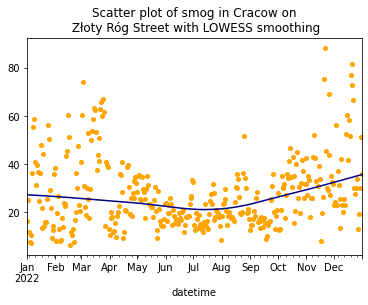

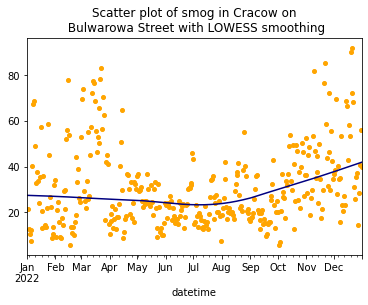

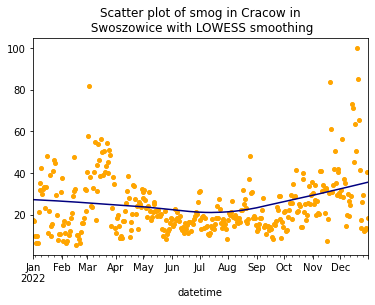

In [218]:
data_1.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_1.smog.values, data_1.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow on\n Złoty Róg Street with LOWESS smoothing')
plt.show()

data_2.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_2.smog.values, data_2.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow on\n Bulwarowa Street with LOWESS smoothing')
plt.show()

data_3.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_1.smog.values, data_1.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow in\n Swoszowice with LOWESS smoothing')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


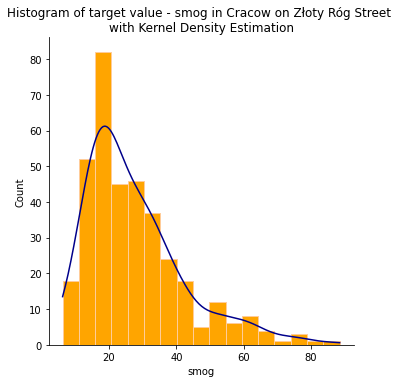

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


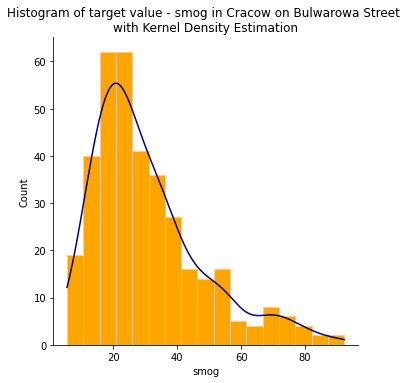

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


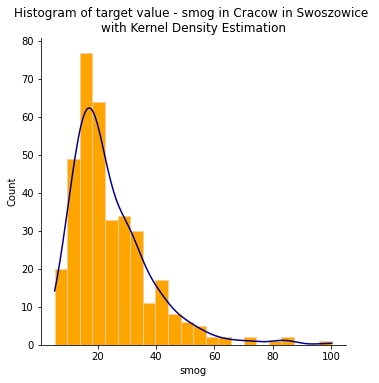

In [219]:
sns.displot(data_1['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow on Złoty Róg Street \nwith Kernel Density Estimation')
plt.show()

sns.displot(data_2['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow on Bulwarowa Street \nwith Kernel Density Estimation')
plt.show()

sns.displot(data_3['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow in Swoszowice \nwith Kernel Density Estimation')
plt.show()

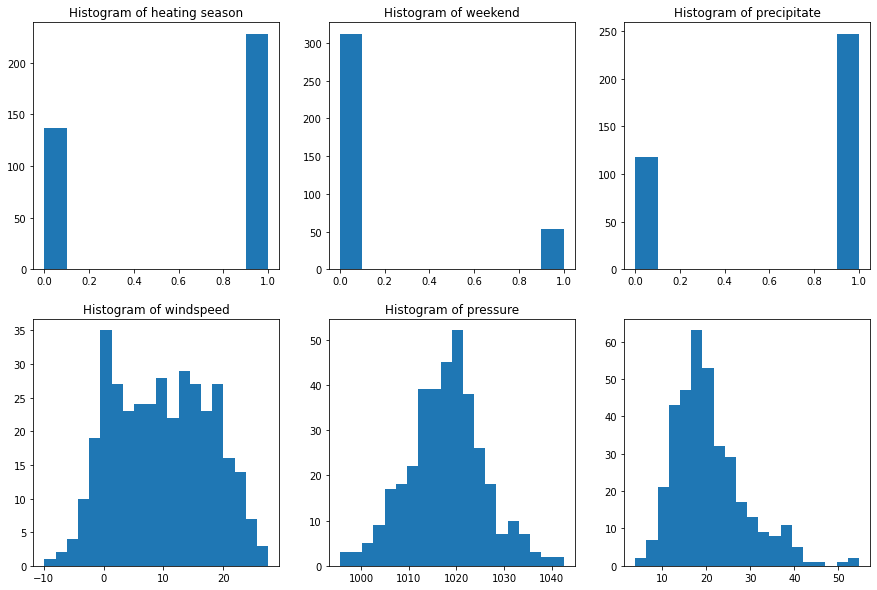

In [220]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].hist(smog_relation['heating sezon'])
axs[0, 0].set_title('Histogram of heating season')
axs[0, 1].hist(smog_relation['weekend'])
axs[0, 1].set_title('Histogram of weekend')
axs[0, 2].hist(smog_relation['precipprob'])
axs[0, 2].set_title('Histogram of precipitate')
axs[1, 0].hist(smog_relation['temp'], bins = 20)
axs[1, 0].set_title('Histogram of temperature')
axs[1, 1].hist(smog_relation['sealevelpressure'], bins = 20)
axs[1, 1].set_title('Histogram of pressure')
axs[1, 2].hist(smog_relation['windspeed'], bins = 20)
axs[1, 0].set_title('Histogram of windspeed')
plt.show()

## Differrence data

In [221]:
smog_relation.describe()

,temp,humidity,windspeed,winddir,precipprob,sealevelpressure,heating sezon,weekend,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,9.784110,75.118356,20.598356,177.084384,0.676712,1017.904932,0.624658,0.145205,27.579063,30.665934,24.464011
std,7.957246,13.351763,8.217480,102.871982,0.468374,8.131500,0.484876,0.352791,14.609631,17.128022,13.795016
min,-9.900000,43.200000,3.800000,8.100000,0.000000,995.500000,0.000000,0.000000,6.200000,5.500000,5.300000
25%,2.900000,64.800000,14.300000,50.700000,0.000000,1012.800000,0.000000,0.000000,17.300000,18.400000,15.075000
50%,9.900000,77.400000,19.000000,228.900000,1.000000,1018.300000,1.000000,0.000000,23.800000,25.600000,20.500000
75%,16.100000,86.000000,24.900000,253.400000,1.000000,1022.600000,1.000000,0.000000,34.600000,37.525000,30.825000
max,27.500000,97.600000,54.700000,354.800000,1.000000,1042.500000,1.000000,1.000000,88.500000,92.200000,100.300000


In [222]:
smog_relation['pressure_diff'] = smog_relation['sealevelpressure'] - smog_relation['sealevelpressure'].mean()

In [223]:
smog_relation['pressure_diff'].describe()

count    3.650000e+02
mean     4.858944e-14
std      8.131500e+00
min     -2.240493e+01
25%     -5.104932e+00
50%      3.950685e-01
75%      4.695068e+00
max      2.459507e+01
Name: pressure_diff, dtype: float64

## Pressure's influence on windspeed

In [224]:
%%writefile wind_speed_ppc.stan

generated quantities {
  real alpha = normal_rng(20, 1);
  real beta = normal_rng(0, 1);
  real sigma = normal_rng(10, 1);
  real pressure_diff = normal_rng(0, 10);
  real wind_speed = normal_rng(alpha + beta * pressure_diff, sigma);
}

Overwriting wind_speed_ppc.stan


In [225]:
%%writefile wind_speed_fit.stan

data {
  int<lower=0> N;  // number of observations
  vector[N] pressure;  // pressure data
  vector[N] wind_speed;  // wind speed data
}

parameters {
  real alpha;  // intercept for wind_speed ~ pressure
  real beta;  // coefficient for pressure
  real<lower=0> sigma;  // standard deviation for wind_speed ~ pressure
}

model {
  // Priors
  alpha ~ normal(20, 1);
  beta ~ normal(0, 1);
  sigma ~ normal(10, 1);

  // Likelihood
  wind_speed ~ normal(alpha + beta * pressure, sigma);
}

generated quantities {
    real wind_speed_hat[N] = normal_rng(alpha + beta * pressure, sigma);
}

Overwriting wind_speed_fit.stan


In [226]:
wind_speed_ppc = CmdStanModel(stan_file='./wind_speed_ppc.stan')

15:20:13 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/wind_speed_ppc.stan to exe file /home/projekt/DA_projectv1500/DA_project/wind_speed_ppc
15:20:26 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/wind_speed_ppc


In [227]:
wind_ppc = wind_speed_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
wind_ppc.summary()

15:20:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:20:26 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,20.007600,0.015739,1.00751,18.33730,19.999300,21.65790,4097.76,56133.7,0.999359
beta,-0.001337,0.015979,1.00705,-1.63979,-0.000185,1.65189,3971.75,54407.5,0.999984
sigma,10.016700,0.016250,0.99792,8.35568,10.022800,11.62200,3771.28,51661.4,1.000410
pressure_diff,0.237668,0.160250,10.35120,-16.69680,0.178100,17.08040,4172.44,57156.7,0.999458
wind_speed,19.816200,0.229669,14.51000,-3.50632,19.874500,43.19740,3991.45,54677.3,0.999351


In [228]:
wind_ppc_data = wind_ppc.draws_pd()

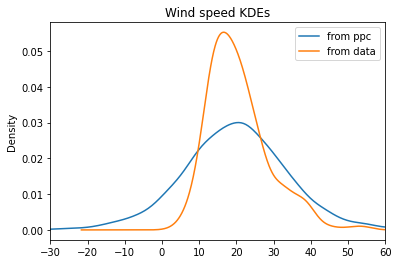

In [229]:
wind_ppc_data.wind_speed.plot.kde(label='from ppc')
smog_relation.windspeed.plot.kde(label='from data')
plt.xlim(-30, 60)
plt.legend()
plt.title("Wind speed KDEs")
plt.show()

In [230]:
smog_relation.windspeed.values.shape

(365,)

In [231]:
smog_relation.dropna(inplace=True)

In [232]:
pressure = smog_relation["pressure_diff"].values
windspeed = smog_relation["windspeed"].values

In [233]:
smog_relation["smog Bulwarowa"].describe()

count    361.000000
mean      30.655956
std       17.154645
min        5.500000
25%       18.400000
50%       25.500000
75%       37.200000
max       92.200000
Name: smog Bulwarowa, dtype: float64

In [234]:
wind_speed_fit = CmdStanModel(stan_file='./wind_speed_fit.stan')

15:20:29 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/wind_speed_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/wind_speed_fit
15:20:45 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/wind_speed_fit
15:20:45 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
15:20:45 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/projekt/DA_projectv1500/DA_project/wind_speed_fit.hpp /home/projekt/DA_projectv1500/DA_project/wind_speed_fit.stan
Warning in '/home/projekt/DA_projectv1500/DA_project/wind_speed_fit.stan', line 25, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sig

In [235]:
data = {
    'N': len(pressure),
    'pressure': pressure,
    'wind_speed': windspeed
}

fit = wind_speed_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit.summary())

15:20:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:20:46 - cmdstanpy - INFO - CmdStan done processing.
15:20:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
Consider re-running with show_console=True if the above output is unclear!



                           Mean      MCSE    StdDev          5%         50%  \
lp__                -929.307000  0.078870  1.119030 -931.594000 -929.043000   
alpha                 20.553400  0.041411  0.336413   20.030100   20.573900   
beta                  -0.257684  0.003344  0.054279   -0.348352   -0.256685   
sigma                  8.166610  0.013567  0.295654    7.704150    8.163250   
wind_speed_hat[1]     20.037800  0.380637  8.622190    7.204530   20.059600   
...                         ...       ...       ...         ...         ...   
wind_speed_hat[357]   19.664500  0.406109  8.637260    3.793130   19.807600   
wind_speed_hat[358]   18.793200  0.356874  7.647270    6.723420   18.524700   
wind_speed_hat[359]   21.369200  0.418194  8.293010    7.480730   21.101800   
wind_speed_hat[360]   21.221500  0.420785  8.423740    6.524130   21.201200   
wind_speed_hat[361]   20.639300  0.439378  8.358780    7.196340   20.572900   

                            95%     N_Eff   N_Eff/

In [236]:
wind_fit_data = fit.draws_pd()

In [237]:
wind_fit_df = pd.DataFrame(wind_fit_data.loc[:, 'wind_speed_hat[1]':f'wind_speed_hat[{len(pressure)}]'].values.flatten())
wind_fit_df.columns = ["windspeed"]
wind_fit_df.head()

,windspeed
0,22.8942
1,21.9897
2,32.9990
3,13.0050
4,27.8444


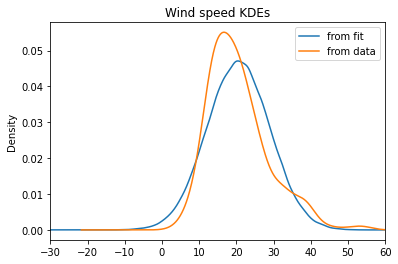

In [238]:
wind_fit_df.windspeed.plot.kde(label='from fit')
smog_relation.windspeed.plot.kde(label='from data')
plt.xlim(-30, 60)
plt.legend()
plt.title("Wind speed KDEs")
plt.show()

## Smog model Złoty Róg Street

In [239]:
df_zr = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Złoty Róg", "sealevelpressure"]]

<Axes: xlabel='precipprob', ylabel='smog Złoty Róg'>

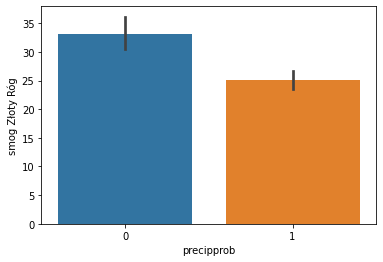

In [240]:
sns.barplot(data=df_zr, x="precipprob", y="smog Złoty Róg")

In [241]:
precip_influence = df_zr[df_zr.precipprob == 1]["smog Złoty Róg"].mean() - df_zr[df_zr.precipprob == 0]["smog Złoty Róg"].mean()
precip_influence

-8.115135911447393

<Axes: xlabel='heating sezon', ylabel='smog Złoty Róg'>

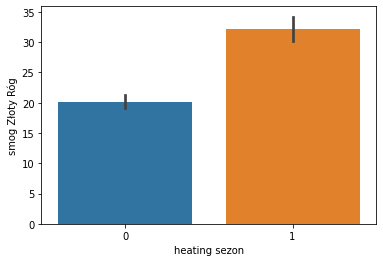

In [242]:
sns.barplot(data=df_zr, x="heating sezon", y="smog Złoty Róg")

In [243]:
sezon_influence = df_zr[df_zr["heating sezon"] == 1]["smog Złoty Róg"].mean() - df_zr[df_zr["heating sezon"] == 0]["smog Złoty Róg"].mean()
sezon_influence

12.060277777777781

<Axes: xlabel='weekend', ylabel='smog Złoty Róg'>

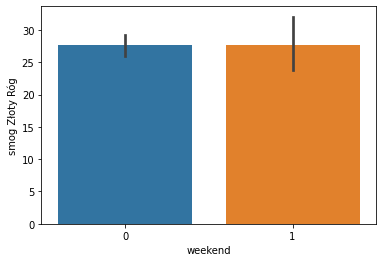

In [244]:
sns.barplot(data=df_zr, x="weekend", y="smog Złoty Róg")

In [245]:
weekend_influence = df_zr[df_zr["weekend"] == 1]["smog Złoty Róg"].mean() - df_zr[df_zr["weekend"] == 0]["smog Złoty Róg"].mean()
weekend_influence

0.0960853871048073

In [246]:
%%writefile smog_zr_ppc.stan

generated quantities {
  real alpha = normal_rng(30, 2);
  real beta_temp = normal_rng(0, 1);
  real beta_ws = normal_rng(0, 1);
  real d_pp = normal_rng(-9, 1);
  real d_hs = normal_rng(13, 1);
  real d_wn = normal_rng(1, 2);
  real<lower=0> sigma = normal_rng(15, 1);
    
  real windspeed = normal_rng(20, 10);
  int<lower=0, upper=1> precipprob = bernoulli_rng(0.67);
  int<lower=0, upper=1> heating_sezon = bernoulli_rng(0.62);
  int<lower=0, upper=1> weekend = bernoulli_rng(0.14);
  
  real temp = normal_rng(10, 8);
  
  real mean = alpha + beta_temp * temp + beta_ws * windspeed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
  real smog = normal_rng(mean, sigma);
}

Overwriting smog_zr_ppc.stan


In [247]:
smog_zr_ppc = CmdStanModel(stan_file='./smog_zr_ppc.stan')

15:20:53 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_zr_ppc.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_zr_ppc
15:21:07 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_zr_ppc


In [248]:
smog_zr_ppc_samples = smog_zr_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_zr_ppc_samples.summary()

15:21:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:21:08 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,30.004900,0.031647,2.002290,26.81090,29.953900,33.29720,4003.04,14296.6,1.000450
beta_temp,0.007404,0.015887,1.013040,-1.66837,0.020577,1.65770,4065.99,14521.4,0.999368
beta_ws,-0.013674,0.016325,0.998415,-1.67244,-0.011212,1.59987,3740.50,13358.9,0.999807
d_pp,-9.011190,0.015904,0.983482,-10.61610,-9.006210,-7.40807,3824.21,13657.9,0.999644
d_hs,13.025500,0.017144,1.017910,11.34250,13.026100,14.70180,3525.23,12590.1,1.000080
d_wn,0.972134,0.031853,2.008530,-2.34917,1.040390,4.17954,3976.11,14200.4,0.999643
sigma,15.004900,0.015557,0.994045,13.41210,14.991900,16.66550,4082.86,14581.6,1.000630
windspeed,20.213900,0.156797,9.919030,4.09917,20.157800,36.64960,4001.88,14292.4,0.999583
precipprob,0.686250,0.007393,0.464074,0.00000,1.000000,1.00000,3940.80,14074.3,0.999553
heating_sezon,0.615750,0.007587,0.486478,0.00000,1.000000,1.00000,4110.90,14681.8,1.001750


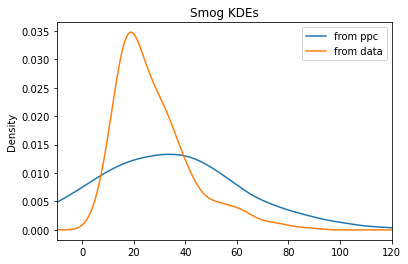

In [249]:
smog_zr_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [353]:
%%writefile smog_zr_ppc_s.stan

generated quantities {
  real alpha = normal_rng(50, 2);
  real beta_temp = normal_rng(0, 1);
  real beta_ws = normal_rng(0, 1);
  real d_pp = normal_rng(-9, 1);
  real d_hs = normal_rng(13, 1);
  real d_wn = normal_rng(1, 2);
  real<lower=0> sigma = normal_rng(1, 1);
    
  real windspeed = normal_rng(20, 10);
  int<lower=0, upper=1> precipprob = bernoulli_rng(0.67);
  int<lower=0, upper=1> heating_sezon = bernoulli_rng(0.62);
  int<lower=0, upper=1> weekend = bernoulli_rng(0.14);
  
  real temp = normal_rng(10, 8);
  
  real mean = alpha + beta_temp * temp + beta_ws * windspeed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
  real smog = student_t_rng(1, mean, sigma);
}

Overwriting smog_zr_ppc_s.stan


In [354]:
smog_zr_ppc_s = CmdStanModel(stan_file='./smog_zr_ppc_s.stan')

15:55:21 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s
15:55:31 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s


In [355]:
smog_zr_ppc_s_samples = smog_zr_ppc_s.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_zr_ppc_s_samples.summary()

15:55:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:55:34 - cmdstanpy - INFO - CmdStan done processing.
15:55:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_rng: Scale parameter is -0.0883008, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s.stan', line 19, column 2 to column 44)
	Exception: student_t_rng: Scale parameter is -0.401671, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s.stan', line 19, column 2 to column 44)
	Exception: student_t_rng: Scale parameter is -0.0481086, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s.stan', line 19, column 2 to column 44)
	Exception: student_t_rng: Scale parameter is -1.48167, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_ppc_s.stan', line 19, column 2 to column 44)
	Exception: student_t_rng: Scale parameter is -0.482034, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,42.326800,0.284521,18.086700,0.00000,49.54180,53.05530,4041.02,30156.9,0.999862
beta_temp,-0.000896,0.014724,0.924712,-1.55076,0.00000,1.54329,3943.96,29432.5,0.999695
beta_ws,0.039226,0.014481,0.907061,-1.49509,0.00000,1.58440,3923.38,29278.9,0.999981
d_pp,-7.606500,0.052710,3.360970,-10.54210,-8.75317,0.00000,4065.76,30341.5,0.999707
d_hs,11.010300,0.076721,4.769580,0.00000,12.76330,14.52730,3864.85,28842.2,0.999915
d_wn,0.881618,0.030206,1.902880,-2.15179,0.59397,4.16319,3968.57,29616.2,1.000230
sigma,1.090050,0.014214,0.855500,0.00000,1.03365,2.64309,3622.66,27034.8,0.999455
windspeed,16.942400,0.180719,11.645000,0.00000,17.82770,35.44330,4152.13,30986.0,0.999633
precipprob,0.578250,0.008274,0.493901,0.00000,1.00000,1.00000,3563.57,26593.8,0.999460
heating_sezon,0.533500,0.007937,0.498939,0.00000,1.00000,1.00000,3951.69,29490.2,0.999389


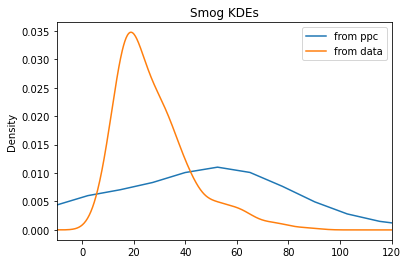

In [356]:
smog_zr_ppc_s_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [250]:
%%writefile smog_ws_zr_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] pressure;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
  real alpha_wind;
  real beta_wind;
  real sigma_wind;
  real wind_speed;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha_wind ~ normal(20, 1);
  beta_wind ~ normal(0, 1);
  sigma_wind ~ normal(10, 1);
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-9, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  wind_speed ~ normal(alpha_wind + beta_wind * pressure, sigma_wind);
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Overwriting smog_ws_zr_fit.stan


In [251]:
%%writefile smog_zr_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-9, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Overwriting smog_zr_fit.stan


In [252]:
%%writefile smog_ws_zr_fit_s.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] pressure;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
  real alpha_wind;
  real beta_wind;
  real sigma_wind;
  real wind_speed;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha_wind ~ normal(20, 1);
  beta_wind ~ normal(0, 1);
  sigma_wind ~ normal(10, 1);
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-9, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  wind_speed ~ normal(alpha_wind + beta_wind * pressure, sigma_wind);
  smog ~ student_t(1, mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = student_t_rng(1, mu[j], sigma);
        log_lik[j] = student_t_lpdf(smog[j]|1, mu[j], sigma);
    }
}

Overwriting smog_ws_zr_fit_s.stan


In [357]:
%%writefile smog_zr_fit_s.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(50, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-9, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(1, 2);
  sigma ~ normal(1, 1);

  // Likelihood
  smog ~ student_t(1, mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = student_t_rng(1, mu[j], sigma);
        log_lik[j] = student_t_lpdf(smog[j]|1, mu[j], sigma);
    }
}

Overwriting smog_zr_fit_s.stan


In [254]:
smog_ws_zr_fit = CmdStanModel(stan_file='./smog_ws_zr_fit.stan')

15:21:10 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit
15:21:27 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit


In [255]:
smog_zr_fit = CmdStanModel(stan_file='./smog_zr_fit.stan')

15:21:28 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_zr_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_zr_fit
15:21:45 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_zr_fit


In [256]:
smog_ws_zr_fit_s = CmdStanModel(stan_file='./smog_ws_zr_fit_s.stan')

15:21:45 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s
15:22:08 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s


In [358]:
smog_zr_fit_s = CmdStanModel(stan_file='./smog_zr_fit_s.stan')

15:57:15 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s
15:57:32 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s


In [258]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'pressure': df_zr.sealevelpressure.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_ws_zr = smog_ws_zr_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_ws_zr.summary())

15:22:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:22:29 - cmdstanpy - INFO - CmdStan done processing.
15:22:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.70427, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.601857, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.617113, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.857282, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.65898, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 6


                     Mean        MCSE       StdDev           5%          50%  \
lp__         -3027.770000  768.263000  2403.390000 -9567.730000 -1992.780000   
alpha            0.222576    0.658745     0.947480    -1.176450     0.351817   
beta_temp        0.650060    0.519112     0.804314    -0.769324     1.206890   
beta_ws          0.253369    0.251317     0.363827    -0.254848     0.293176   
d_pp             0.217412    0.956258     1.373410    -1.939800     1.375880   
...                   ...         ...          ...          ...          ...   
log_lik[357]    -4.257450    0.490121     1.134890    -7.614410    -4.032030   
log_lik[358]    -5.180740    0.521556     1.812160   -10.020400    -4.420670   
log_lik[359]    -7.133770    1.324580     4.749660   -18.916000    -4.940170   
log_lik[360]   -14.618300    4.399980    15.739800   -52.536100    -6.443390   
log_lik[361]    -8.153570    1.944730     6.731900   -26.517400    -5.218960   

                      95%     N_Eff   

In [259]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'wind_speed': df_zr.windspeed.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_zr = smog_zr_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_zr.summary())

15:22:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:22:32 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1076.940000  0.109076  1.668000 -1079.870000 -1076.600000   
alpha           34.899900  0.095397  1.372620    32.621100    34.953400   
beta_temp       -0.040447  0.004625  0.079429    -0.163917    -0.041417   
beta_ws         -0.514140  0.003749  0.066348    -0.628531    -0.519427   
d_pp            -7.579990  0.043440  0.796102    -8.949540    -7.545410   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.646870  0.004065  0.077738    -3.780090    -3.643640   
log_lik[358]    -3.908240  0.004686  0.071465    -4.029270    -3.904100   
log_lik[359]    -3.723850  0.003571  0.055265    -3.817900    -3.725040   
log_lik[360]    -4.302100  0.006813  0.110449    -4.480680    -4.306510   
log_lik[361]    -3.490990  0.002989  0.049999    -3.576720    -3.487880   

                      95%    N_Eff   N_Eff/s     R_hat  
lp__         -1074.570000  233.849   71.5

In [260]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'pressure': df_zr.sealevelpressure.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_ws_zr_s = smog_ws_zr_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_ws_zr_s.summary())

15:22:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:22:39 - cmdstanpy - INFO - CmdStan done processing.
15:22:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_zr_fit_s.stan',


                    Mean        MCSE      StdDev          5%         50%  \
lp__         -571.692000  166.821000  239.541000 -864.660000 -519.988000   
alpha           0.574691    1.004530    1.442410   -1.744480    1.772870   
beta_temp       0.862742    0.326980    0.469515    0.159294    1.133540   
beta_ws         0.457698    0.842042    1.209100   -0.840884    0.761890   
d_pp           -0.161234    0.552488    0.793327   -1.398140   -0.019807   
...                  ...         ...         ...         ...         ...   
log_lik[357]   -3.893950    0.182087    0.261462   -4.140280   -3.895820   
log_lik[358]   -5.146830    0.555945    0.798291   -6.154100   -4.696260   
log_lik[359]   -5.967270    0.505268    0.725522   -6.839500   -5.498570   
log_lik[360]   -7.220790    0.562604    0.807853   -8.248570   -6.566100   
log_lik[361]   -6.193130    0.482980    0.693518   -7.060940   -5.724420   

                     95%    N_Eff  N_Eff/s      R_hat  
lp__         -215.082000  2.06

In [261]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'wind_speed': df_zr.windspeed.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_zr_s = smog_zr_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_zr_s.summary())

15:22:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:22:43 - cmdstanpy - INFO - CmdStan done processing.
15:22:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s.stan', line 38, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_zr_fit_s.stan', line 38, column 2


                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1038.220000  0.160840  1.812300 -1041.730000 -1037.910000   
alpha           31.300200  0.121377  1.461720    28.772500    31.332200   
beta_temp        0.169255  0.005382  0.079079     0.045571     0.171648   
beta_ws         -0.559837  0.003293  0.055878    -0.646788    -0.562908   
d_pp            -6.189060  0.044037  0.716836    -7.327270    -6.164650   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.418220  0.007743  0.150132    -3.680820    -3.413600   
log_lik[358]    -3.993760  0.007998  0.120419    -4.188170    -3.998600   
log_lik[359]    -3.512520  0.007462  0.121318    -3.713600    -3.510990   
log_lik[360]    -5.217200  0.006726  0.101206    -5.388570    -5.212510   
log_lik[361]    -3.233630  0.006717  0.107199    -3.417900    -3.222240   

                      95%    N_Eff  N_Eff/s     R_hat  
lp__         -1035.890000  126.961  23.138

In [262]:
smog_ws_zr_fit_data = fit_ws_zr.draws_pd()
smog_ws_zr_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1611.05,2.407930e-01,0.00006,2.0,4.0,1.0,1617.26,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
1,-1611.05,1.195490e-04,0.00006,1.0,3.0,1.0,1617.99,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
2,-1611.05,1.707020e-17,0.00006,1.0,2.0,1.0,1619.67,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
3,-1611.05,3.860570e-06,0.00006,1.0,3.0,1.0,1616.45,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
4,-1611.16,4.000000e-01,0.00006,2.0,5.0,1.0,1619.92,-1.17600,-0.206257,0.749342,...,-7.66670,-4.85514,-4.74801,-4.87197,-5.07968,-4.27479,-4.4207,-4.94019,-6.22232,-5.21902


In [263]:
smog_ws_zr_fit_df = pd.DataFrame(smog_ws_zr_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_ws_zr_fit_df.columns = ["smog"]
smog_ws_zr_fit_df.head()

,smog
0,-5.43036
1,25.56890
2,-13.02720
3,-20.33960
4,-18.33360


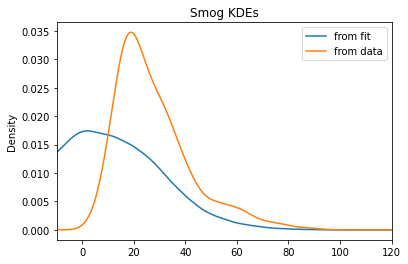

In [264]:
smog_ws_zr_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [359]:
smog_zr_fit_data = fit_zr.draws_pd()
smog_zr_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1076.45,0.990718,0.02853,7.0,127.0,0.0,1078.96,33.1577,0.048133,-0.544594,...,-6.25381,-3.47628,-3.46684,-3.48442,-3.55899,-3.60258,-3.85275,-3.65658,-4.32664,-3.52854
1,-1079.02,0.914582,0.02853,3.0,15.0,0.0,1080.65,33.1718,0.174498,-0.586663,...,-6.28058,-3.46767,-3.46883,-3.47926,-3.56585,-3.55872,-3.81530,-3.64215,-4.34223,-3.52620
2,-1080.88,0.998109,0.02853,6.0,63.0,0.0,1084.86,33.0796,-0.020594,-0.416318,...,-6.92987,-3.43108,-3.44462,-3.43270,-3.57432,-3.64040,-3.76264,-3.60236,-4.60484,-3.51930
3,-1077.53,0.861678,0.02853,7.0,127.0,0.0,1089.79,32.9060,-0.097167,-0.390716,...,-6.52800,-3.45016,-3.41522,-3.45320,-3.47287,-3.81767,-3.95991,-3.67575,-4.34064,-3.42355
4,-1079.99,0.998727,0.02853,7.0,127.0,0.0,1083.58,32.4508,-0.014935,-0.437542,...,-6.59978,-3.43835,-3.41636,-3.44355,-3.50049,-3.70806,-3.88341,-3.72726,-4.39867,-3.62450


In [360]:
smog_zr_fit_df = pd.DataFrame(smog_zr_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_zr_fit_df.columns = ["smog"]
smog_zr_fit_df.head()

,smog
0,39.7464
1,30.0984
2,26.7973
3,19.1357
4,10.6854


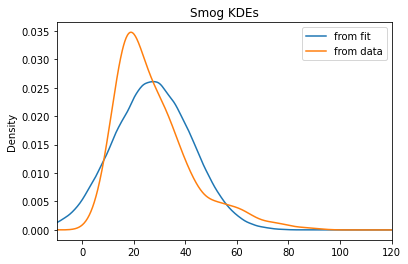

In [267]:
smog_zr_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [268]:
smog_ws_zr_fit_data_s = fit_ws_zr_s.draws_pd()
smog_ws_zr_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-215.189,5.671390e-116,8.313460e-07,1.0,1.0,0.0,223.254,0.479852,1.40909,-0.840884,...,-8.83212,-6.95435,-6.62379,-6.82134,-7.14036,-4.14027,-6.15409,-6.83949,-8.24856,-7.06093
1,-215.189,5.278810e-58,8.313460e-07,1.0,2.0,1.0,221.760,0.479852,1.40909,-0.840884,...,-8.83212,-6.95435,-6.62379,-6.82134,-7.14036,-4.14027,-6.15409,-6.83949,-8.24856,-7.06093
2,-215.189,6.020810e-08,8.313460e-07,1.0,2.0,1.0,221.126,0.479852,1.40909,-0.840884,...,-8.83212,-6.95435,-6.62379,-6.82134,-7.14036,-4.14027,-6.15409,-6.83949,-8.24856,-7.06093
3,-215.189,6.590400e-11,8.313460e-07,1.0,3.0,1.0,218.083,0.479852,1.40909,-0.840884,...,-8.83212,-6.95435,-6.62379,-6.82134,-7.14036,-4.14027,-6.15409,-6.83949,-8.24856,-7.06093
4,-215.132,2.500000e-01,8.313460e-07,2.0,4.0,1.0,217.688,0.479852,1.40909,-0.840883,...,-8.83212,-6.95435,-6.62379,-6.82134,-7.14036,-4.14028,-6.15409,-6.83949,-8.24856,-7.06094


In [269]:
smog_ws_zr_fit_s_df = pd.DataFrame(smog_ws_zr_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_ws_zr_fit_s_df.columns = ["smog"]
smog_ws_zr_fit_s_df.head()

,smog
0,11.813000
1,12.678600
2,12.037300
3,4.922780
4,0.479662


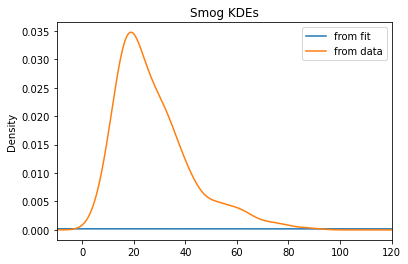

In [270]:
smog_ws_zr_fit_s_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [361]:
smog_zr_fit_data_s = fit_zr_s.draws_pd()
smog_zr_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1039.51,0.999693,0.023288,7.0,127.0,0.0,1041.53,33.3983,0.080513,-0.557283,...,-6.11147,-3.14857,-3.38389,-3.17015,-3.86431,-3.50299,-4.11416,-3.53126,-5.12668,-3.40538
1,-1038.10,0.937796,0.023288,8.0,255.0,0.0,1044.54,29.1315,0.163624,-0.497332,...,-6.20752,-3.18398,-3.50329,-3.17435,-4.01268,-3.49565,-3.88953,-3.33413,-5.27669,-3.39828
2,-1040.75,0.857467,0.023288,5.0,39.0,0.0,1043.06,28.6594,0.113886,-0.416536,...,-6.28287,-3.17624,-3.42148,-3.16153,-3.99343,-3.66635,-3.88551,-3.31200,-5.35108,-3.36823
3,-1041.15,0.785702,0.023288,4.0,15.0,0.0,1042.49,28.6679,0.123921,-0.434034,...,-6.25086,-3.22453,-3.49233,-3.20724,-4.03301,-3.59864,-3.84592,-3.31947,-5.33321,-3.41790
4,-1040.81,0.965455,0.023288,7.0,127.0,0.0,1042.94,32.9253,0.243302,-0.662485,...,-6.12935,-3.08554,-3.39884,-3.15461,-3.86264,-3.25577,-4.15490,-3.75118,-5.11513,-3.08984


In [362]:
smog_zr_fit_s_df = pd.DataFrame(smog_zr_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_zr_fit_s_df.columns = ["smog"]
smog_zr_fit_s_df.head()

,smog
0,29.74740
1,29.21390
2,-113.70600
3,42.76510
4,8.15645


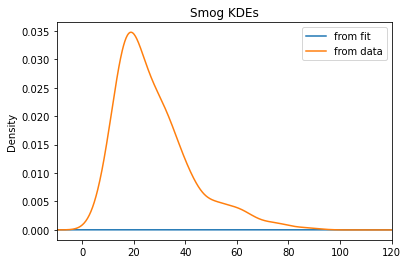

In [363]:
smog_zr_fit_s_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

## Smog model Bulwarowa Street

In [274]:
df_b = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Bulwarowa", "sealevelpressure"]]

<Axes: xlabel='precipprob', ylabel='smog Bulwarowa'>

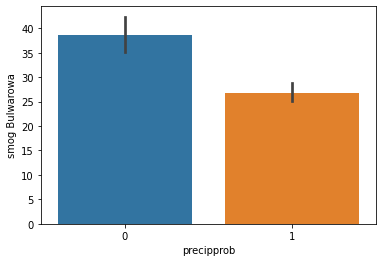

In [275]:
sns.barplot(data=df_b, x="precipprob", y="smog Bulwarowa")

In [276]:
precip_influence = df_b[df_b.precipprob == 1]["smog Bulwarowa"].mean() - df_b[df_b.precipprob == 0]["smog Bulwarowa"].mean()
precip_influence

-11.864557937508753

<Axes: xlabel='heating sezon', ylabel='smog Bulwarowa'>

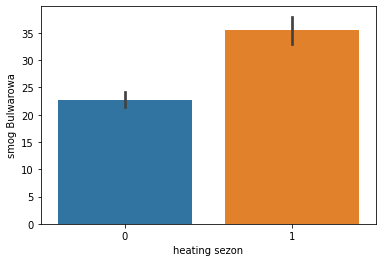

In [277]:
sns.barplot(data=df_b, x="heating sezon", y="smog Bulwarowa")

In [278]:
sezon_influence = df_b[df_b["heating sezon"] == 1]["smog Bulwarowa"].mean() - df_b[df_b["heating sezon"] == 0]["smog Bulwarowa"].mean()
sezon_influence

12.73185620915033

<Axes: xlabel='weekend', ylabel='smog Bulwarowa'>

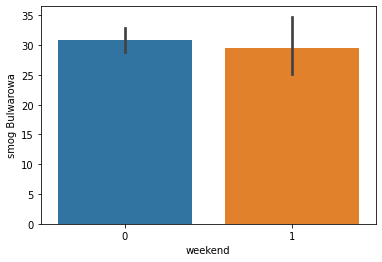

In [279]:
sns.barplot(data=df_b, x="weekend", y="smog Bulwarowa")

In [280]:
weekend_influence = df_b[df_b["weekend"] == 1]["smog Bulwarowa"].mean() - df_b[df_b["weekend"] == 0]["smog Bulwarowa"].mean()
weekend_influence

-1.278590988299726

In [281]:
df_b["weekend"].value_counts(normalize=True)

weekend
0    0.855956
1    0.144044
Name: proportion, dtype: float64

In [282]:
%%writefile smog_bw_ppc.stan

generated quantities {
  real alpha = normal_rng(30, 2);
  real beta_temp = normal_rng(0, 1);
  real beta_ws = normal_rng(0, 1);
  real d_pp = normal_rng(-12, 1);
  real d_hs = normal_rng(13, 1);
  real d_wn = normal_rng(-1, 2);
  real<lower=0> sigma = normal_rng(15, 1);
    
  real windspeed = normal_rng(20, 10);
  int<lower=0, upper=1> precipprob = bernoulli_rng(0.67);
  int<lower=0, upper=1> heating_sezon = bernoulli_rng(0.62);
  int<lower=0, upper=1> weekend = bernoulli_rng(0.14);
  
  real temp = normal_rng(10, 8);
  
  real mean = alpha + beta_temp * temp + beta_ws * windspeed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
  real smog = normal_rng(mean, sigma);
}

Overwriting smog_bw_ppc.stan


In [283]:
smog_bw_ppc = CmdStanModel(stan_file='./smog_bw_ppc.stan')

15:23:01 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_bw_ppc.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_bw_ppc
15:23:13 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_bw_ppc


In [284]:
smog_bw_ppc_samples = smog_bw_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
smog_bw_ppc_samples.summary()

15:23:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:23:14 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,29.995600,0.032455,2.025890,26.68750,29.963200,33.39220,3896.41,37108.6,0.999329
beta_temp,0.001495,0.015547,0.982239,-1.63387,-0.018214,1.62199,3991.52,38014.5,0.999205
beta_ws,0.004984,0.016033,1.004250,-1.62672,0.004823,1.68936,3923.25,37364.3,1.000590
d_pp,-11.976600,0.016318,1.017600,-13.67470,-11.969700,-10.30420,3888.74,37035.7,0.999618
d_hs,13.001900,0.015678,0.989906,11.37650,12.982700,14.64770,3986.61,37967.7,0.999406
d_wn,-0.993808,0.031182,1.978750,-4.18639,-1.022110,2.25446,4026.93,38351.7,0.999241
sigma,15.018600,0.015827,0.989930,13.37670,15.033900,16.64680,3912.32,37260.2,0.999864
windspeed,19.998300,0.162769,10.176300,3.40939,19.949500,36.57630,3908.77,37226.3,0.999528
precipprob,0.662250,0.007810,0.473002,0.00000,1.000000,1.00000,3668.35,34936.6,0.999967
heating_sezon,0.623000,0.007971,0.484696,0.00000,1.000000,1.00000,3697.75,35216.6,0.999260


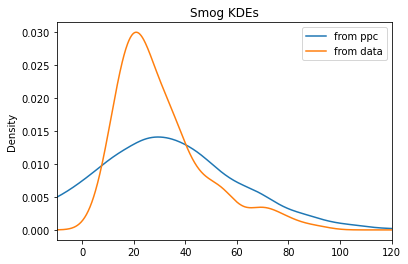

In [285]:
smog_bw_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [286]:
%%writefile smog_ws_bw_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] pressure;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
  real alpha_wind;
  real beta_wind;
  real sigma_wind;
  real wind_speed;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha_wind ~ normal(20, 1);
  beta_wind ~ normal(0, 1);
  sigma_wind ~ normal(10, 1);
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-12, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(-1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  wind_speed ~ normal(alpha_wind + beta_wind * pressure, sigma_wind);
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Writing smog_ws_bw_fit.stan


In [287]:
%%writefile smog_bw_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-12, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(-1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Overwriting smog_bw_fit.stan


In [288]:
%%writefile smog_bw_fit_s.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-12, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(-1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ student_t(1, mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = student_t_rng(1, mu[j], sigma);
        log_lik[j] = student_t_lpdf(smog[j]|1, mu[j], sigma);
    }
}

Overwriting smog_bw_fit_s.stan


In [289]:
smog_ws_bw_fit = CmdStanModel(stan_file='./smog_ws_bw_fit.stan')

15:23:16 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_ws_bw_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_ws_bw_fit
15:23:34 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_ws_bw_fit


In [290]:
smog_bw_fit = CmdStanModel(stan_file='./smog_bw_fit.stan')

15:23:34 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_bw_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_bw_fit
15:23:50 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_bw_fit


In [291]:
smog_bw_fit_s = CmdStanModel(stan_file='./smog_bw_fit_s.stan')

15:23:51 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s
15:24:08 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s


In [292]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'pressure': df_b.sealevelpressure.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit_ws = smog_ws_bw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_ws.summary())

15:24:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:24:10 - cmdstanpy - INFO - CmdStan done processing.
15:24:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.24568, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_bw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.608357, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_bw_fit.stan', line 45, column 2 to column 69)
Consider re-running with show_console=True if the above output is unclear!
15:24:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 80 divergent transitions (80.0%)
	Chain 1 had 1 iterations at max treedepth (1.0%)
	Chain 2 had 95 divergent transitions (95.0%)
	Chain 3 had 77 divergent transitions (77.0%)
	Chain 4 had 1 iterations at max treedepth (1.0%)
	Use function "diagnose()" to see further information.



                     Mean         MCSE       StdDev            5%  \
lp__         -4759.820000  2541.840000  4574.490000 -17556.700000   
alpha            0.426364     0.909593     1.306150     -1.739480   
beta_temp        1.138830     0.344362     0.495784      0.350835   
beta_ws          0.354037     0.861230     1.236960     -0.839839   
d_pp            -0.124136     0.617706     0.887034     -1.398860   
...                   ...          ...          ...           ...   
log_lik[357]    -3.735350     0.251528     0.379377     -4.183910   
log_lik[358]   -10.923200     5.193220     9.414120    -36.688700   
log_lik[359]   -17.509000    10.217200    18.403700    -68.141100   
log_lik[360]   -35.752100    23.700000    42.352300   -150.518000   
log_lik[361]   -13.815400     7.173250    12.976400    -49.227000   

                      50%         95%    N_Eff   N_Eff/s      R_hat  
lp__         -2256.410000 -1646.19000  3.23885  1.112630    3.02755  
alpha            1.309470     

In [293]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'wind_speed': df_b.windspeed.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit = smog_bw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit.summary())

15:24:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:24:13 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1137.790000  0.144195  1.878690 -1141.450000 -1137.600000   
alpha           37.841400  0.125989  1.692730    35.181300    37.920000   
beta_temp        0.030063  0.004857  0.094953    -0.127975     0.028095   
beta_ws         -0.498734  0.004973  0.078898    -0.639061    -0.494886   
d_pp           -10.514900  0.040585  0.823137   -11.880300   -10.495100   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.747890  0.004285  0.073615    -3.881030    -3.743060   
log_lik[358]    -3.609570  0.001718  0.033379    -3.668080    -3.608840   
log_lik[359]    -3.589920  0.001649  0.032676    -3.646710    -3.588770   
log_lik[360]    -4.574310  0.007335  0.119353    -4.782720    -4.574070   
log_lik[361]    -3.592160  0.002406  0.040307    -3.661410    -3.588500   

                      95%    N_Eff  N_Eff/s     R_hat  
lp__         -1135.380000  169.749  40.590

In [294]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'wind_speed': df_b.windspeed.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit_s = smog_bw_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_s.summary())

15:24:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:24:16 - cmdstanpy - INFO - CmdStan done processing.
15:24:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Consider re-running with show_console=True if the above output is unclear!



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1101.970000  0.160371  2.022730 -1105.750000 -1101.650000   
alpha           34.576600  0.104122  1.516660    32.089700    34.540200   
beta_temp        0.259296  0.004820  0.088744     0.106355     0.257022   
beta_ws         -0.549105  0.003393  0.067967    -0.676480    -0.553295   
d_pp            -9.769510  0.042454  0.847116   -11.150600    -9.766750   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.527510  0.005835  0.127785    -3.776490    -3.508790   
log_lik[358]    -3.340290  0.003142  0.067860    -3.450890    -3.338160   
log_lik[359]    -3.358610  0.003199  0.068280    -3.467210    -3.358670   
log_lik[360]    -5.405890  0.005676  0.103598    -5.566960    -5.403650   
log_lik[361]    -3.430310  0.006311  0.107270    -3.630080    -3.415920   

                      95%    N_Eff   N_Eff/s     R_hat  
lp__         -1099.390000  159.082   34.6

In [295]:
smog_ws_bw_fit_data = fit_ws.draws_pd()
smog_ws_bw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-7365.69,0.997574,0.000011,7.0,127.0,0.0,7385.33,0.491511,1.47464,-0.834714,...,-102.731,-17.8754,-11.2154,-21.2497,-23.8943,-3.55075,-18.0642,-29.6597,-67.1682,-23.8311
1,-7296.44,0.999887,0.000011,8.0,255.0,0.0,7377.82,0.491578,1.47601,-0.836571,...,-101.774,-17.7284,-11.1319,-21.0679,-23.6868,-3.54310,-17.9184,-29.4017,-66.5494,-23.6238
2,-7278.31,0.997623,0.000011,7.0,127.0,0.0,7299.47,0.491342,1.47605,-0.836649,...,-101.533,-17.6917,-11.1112,-21.0230,-23.6355,-3.54131,-17.8813,-29.3368,-66.3943,-23.5729
3,-7254.81,0.744523,0.000011,7.0,127.0,0.0,7281.66,0.491317,1.47642,-0.836353,...,-101.199,-17.6411,-11.0828,-20.9604,-23.5639,-3.53898,-17.8308,-29.2454,-66.1785,-23.5004
4,-7202.61,0.802683,0.000011,7.0,127.0,0.0,7258.71,0.492350,1.47636,-0.836761,...,-100.469,-17.5315,-11.0220,-20.8262,-23.4104,-3.53442,-17.7197,-29.0502,-65.7084,-23.3497


In [296]:
smog_ws_bw_fit_df = pd.DataFrame(smog_ws_bw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_b)}]'].values.flatten())
smog_ws_bw_fit_df.columns = ["smog"]
smog_ws_bw_fit_df.head()

,smog
0,9.06973
1,9.73119
2,17.08080
3,6.29804
4,4.14928


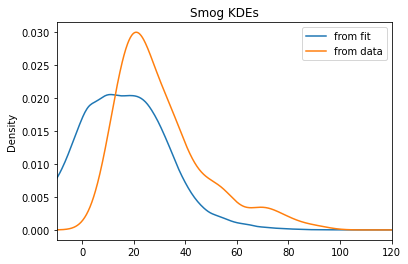

In [297]:
smog_ws_bw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [298]:
smog_bw_fit_data = fit.draws_pd()
smog_bw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1140.82,0.976002,0.034654,7.0,127.0,0.0,1144.39,36.8549,-0.068156,-0.266617,...,-6.22011,-3.59308,-3.61162,-3.58953,-3.67554,-3.96220,-3.61791,-3.61581,-4.75188,-3.59596
1,-1143.55,0.732982,0.034654,7.0,127.0,0.0,1147.67,35.0646,0.013494,-0.416022,...,-5.63858,-3.63958,-3.62354,-3.57018,-3.60955,-3.94215,-3.66744,-3.59096,-4.40845,-3.63530
2,-1139.32,0.911130,0.034654,6.0,63.0,0.0,1144.49,35.3397,0.199700,-0.565992,...,-5.79144,-3.59959,-3.57372,-3.57190,-3.70365,-3.68834,-3.60037,-3.57412,-4.56905,-3.58626
3,-1139.80,0.925477,0.034654,7.0,127.0,0.0,1142.36,35.7950,-0.053872,-0.289099,...,-6.11011,-3.60929,-3.62336,-3.60243,-3.68791,-3.94499,-3.63252,-3.63132,-4.70969,-3.66654
4,-1138.52,0.957238,0.034654,7.0,127.0,0.0,1142.35,38.9784,-0.123442,-0.552863,...,-5.52595,-3.63132,-3.58607,-3.57474,-3.66462,-3.74117,-3.64868,-3.58725,-4.40254,-3.58187


In [299]:
smog_bw_fit_df = pd.DataFrame(smog_bw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_b)}]'].values.flatten())
smog_bw_fit_df.columns = ["smog"]
smog_bw_fit_df.head()

,smog
0,49.47190
1,38.96000
2,31.93690
3,1.33853
4,4.02125


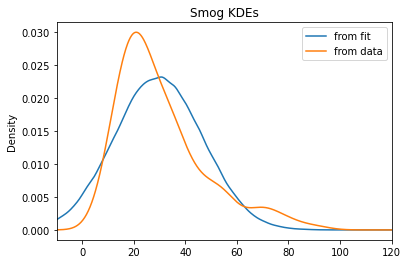

In [300]:
smog_bw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

## Smog model Swoszowice

In [301]:
df_sw = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Swoszowice", "sealevelpressure"]]


<Axes: xlabel='precipprob', ylabel='smog Swoszowice'>

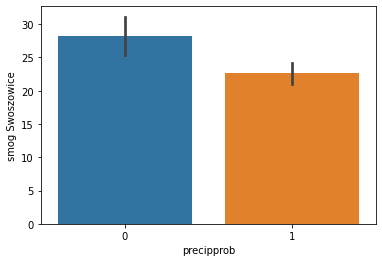

In [302]:
sns.barplot(data=df_sw, x="precipprob", y="smog Swoszowice")

In [303]:
precip_influence = df_sw[df_sw.precipprob == 1]["smog Swoszowice"].mean() - df_sw[df_sw.precipprob == 0]["smog Swoszowice"].mean()
precip_influence

-5.643015272523474

<Axes: xlabel='heating sezon', ylabel='smog Swoszowice'>

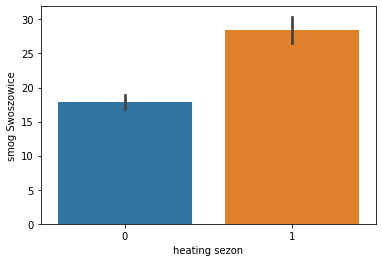

In [304]:
sns.barplot(data=df_sw, x="heating sezon", y="smog Swoszowice")

In [305]:
sezon_influence = df_sw[df_sw["heating sezon"] == 1]["smog Swoszowice"].mean() - df_sw[df_sw["heating sezon"] == 0]["smog Swoszowice"].mean()
sezon_influence

10.602571895424838

<Axes: xlabel='weekend', ylabel='smog Swoszowice'>

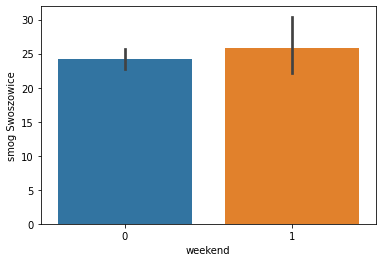

In [306]:
sns.barplot(data=df_sw, x="weekend", y="smog Swoszowice")

In [307]:
weekend_influence = df_sw[df_sw["weekend"] == 1]["smog Swoszowice"].mean() - df_sw[df_sw["weekend"] == 0]["smog Swoszowice"].mean()
weekend_influence

1.645848892208118

In [308]:
%%writefile smog_sw_ppc.stan

generated quantities {
  real alpha = normal_rng(25, 2);
  real beta_temp = normal_rng(0, 1);
  real beta_ws = normal_rng(0, 1);
  real d_pp = normal_rng(-6, 1);
  real d_hs = normal_rng(11, 1);
  real d_wn = normal_rng(2, 2);
  real<lower=0> sigma = normal_rng(20, 1);
    
  real windspeed = normal_rng(20, 10);
  int<lower=0, upper=1> precipprob = bernoulli_rng(0.67);
  int<lower=0, upper=1> heating_sezon = bernoulli_rng(0.62);
  int<lower=0, upper=1> weekend = bernoulli_rng(0.14);
  
  real temp = normal_rng(10, 8);
  
  real mean = alpha + beta_temp * temp + beta_ws * windspeed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
  real smog = normal_rng(mean, sigma);
}

Overwriting smog_sw_ppc.stan


In [309]:
smog_sw_ppc = CmdStanModel(stan_file='./smog_sw_ppc.stan')

15:24:26 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_sw_ppc.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_sw_ppc
15:24:37 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_sw_ppc


In [310]:
smog_sw_ppc_samples = smog_sw_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_sw_ppc_samples.summary()

15:24:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:24:38 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,25.004900,0.031647,2.002290,21.81090,24.953900,28.29720,4003.04,30098.1,1.000450
beta_temp,0.007404,0.015887,1.013040,-1.66837,0.020577,1.65770,4065.99,30571.4,0.999368
beta_ws,-0.013674,0.016325,0.998415,-1.67244,-0.011212,1.59987,3740.50,28124.1,0.999807
d_pp,-6.011190,0.015904,0.983482,-7.61608,-6.006210,-4.40807,3824.21,28753.4,0.999644
d_hs,11.025500,0.017144,1.017910,9.34253,11.026100,12.70180,3525.23,26505.5,1.000080
d_wn,1.972130,0.031853,2.008530,-1.34917,2.040390,5.17954,3976.11,29895.6,0.999643
sigma,20.004900,0.015557,0.994045,18.41210,19.991900,21.66550,4082.86,30698.2,1.000630
windspeed,20.213900,0.156797,9.919030,4.09917,20.157800,36.64960,4001.88,30089.3,0.999583
precipprob,0.686250,0.007393,0.464074,0.00000,1.000000,1.00000,3940.80,29630.1,0.999553
heating_sezon,0.615750,0.007587,0.486478,0.00000,1.000000,1.00000,4110.90,30909.0,1.001750


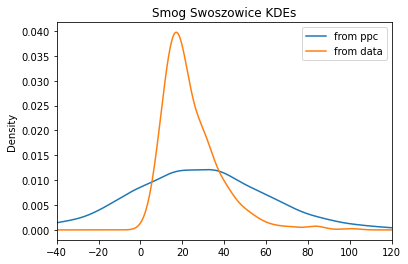

In [311]:
smog_sw_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-40, 120)
plt.legend()
plt.title("Smog Swoszowice KDEs")
plt.show()

In [312]:
%%writefile smog_ws_sw_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] pressure;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
  real alpha_wind;
  real beta_wind;
  real sigma_wind;
  real wind_speed;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha_wind ~ normal(20, 1);
  beta_wind ~ normal(0, 1);
  sigma_wind ~ normal(10, 1);
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-6, 1);
  d_hs ~ normal(11, 1);
  d_wn ~ normal(2, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  wind_speed ~ normal(alpha_wind + beta_wind * pressure, sigma_wind);
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Writing smog_ws_sw_fit.stan


In [313]:
%%writefile smog_sw_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-6, 1);
  d_hs ~ normal(11, 1);
  d_wn ~ normal(2, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Overwriting smog_sw_fit.stan


In [314]:
%%writefile smog_sw_fit_s.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-6, 1);
  d_hs ~ normal(11, 1);
  d_wn ~ normal(2, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ student_t(1, mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = student_t_rng(1, mu[j], sigma);
        log_lik[j] = student_t_lpdf(smog[j]|1, mu[j], sigma);
    }
}

Overwriting smog_sw_fit_s.stan


In [315]:
smog_ws_sw_fit = CmdStanModel(stan_file='./smog_ws_sw_fit.stan')

15:24:40 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit
15:24:56 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit


In [316]:
smog_sw_fit = CmdStanModel(stan_file='./smog_sw_fit.stan')

15:24:57 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_sw_fit.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_sw_fit
15:25:12 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_sw_fit


In [317]:
smog_sw_fit_s = CmdStanModel(stan_file='./smog_sw_fit_s.stan')

15:25:13 - cmdstanpy - INFO - compiling stan file /home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s.stan to exe file /home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s
15:25:31 - cmdstanpy - INFO - compiled model executable: /home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s


In [322]:
data = {
    'N': len(df_sw),
    'precipprob': df_sw.precipprob.values,
    'pressure': df_sw.sealevelpressure.values,
    'temp': df_sw.temp.values,
    'weekend': df_sw.weekend.values,
    'heating_sezon': df_sw['heating sezon'].values,
    'smog': df_sw['smog Swoszowice'].values
}

fit_ws_sw = smog_ws_sw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_ws_sw.summary())

15:39:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:39:26 - cmdstanpy - INFO - CmdStan done processing.
15:39:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.70427, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.601857, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.617113, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.857282, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.65898, but must be positive! (in '/home/projekt/DA_projectv1500/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 6


                     Mean        MCSE       StdDev           5%          50%  \
lp__         -2544.970000  773.487000  2003.160000 -7673.670000 -1656.600000   
alpha            0.302227    0.678612     0.977917    -1.169200     0.349984   
beta_temp        0.544762    0.497501     0.741515    -0.667063     1.101220   
beta_ws          0.238205    0.260621     0.374403    -0.239881     0.353647   
d_pp             0.158297    0.867602     1.247710    -1.913790     1.251620   
...                   ...         ...          ...          ...          ...   
log_lik[357]    -4.177430    0.382773     0.850302    -6.503260    -4.140410   
log_lik[358]    -4.281430    0.207128     0.588032    -5.782600    -4.171620   
log_lik[359]    -4.232610    0.260426     0.621793    -5.957400    -4.144300   
log_lik[360]    -9.763220    3.119700    10.034100   -37.882100    -5.679870   
log_lik[361]    -4.629460    0.577638     1.449660    -8.923140    -4.258650   

                      95%     N_Eff  N

In [324]:
data = {
    'N': len(df_sw),
    'precipprob': df_sw.precipprob.values,
    'wind_speed': df_sw.windspeed.values,
    'temp': df_sw.temp.values,
    'weekend': df_sw.weekend.values,
    'heating_sezon': df_sw['heating sezon'].values,
    'smog': df_sw['smog Swoszowice'].values
}

fit_sw = smog_sw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_sw.summary())

15:39:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:39:45 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1067.720000  0.155481  1.834580 -1071.180000 -1067.510000   
alpha           33.056800  0.126069  1.404720    30.848100    33.041400   
beta_temp       -0.222004  0.005196  0.077847    -0.346904    -0.220873   
beta_ws         -0.493161  0.009070  0.064772    -0.604804    -0.490275   
d_pp            -5.019330  0.045972  0.806773    -6.407800    -5.023420   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.560300  0.003417  0.066375    -3.677260    -3.559660   
log_lik[358]    -4.352060  0.006328  0.105946    -4.517870    -4.348560   
log_lik[359]    -4.918080  0.007495  0.148103    -5.170020    -4.917030   
log_lik[360]    -3.624720  0.004479  0.062118    -3.729250    -3.626400   
log_lik[361]    -4.381840  0.013654  0.180377    -4.698240    -4.370070   

                      95%     N_Eff   N_Eff/s     R_hat  
lp__         -1065.130000  139.2260   42

In [325]:
data = {
    'N': len(df),
    'precipprob': df.precipprob.values,
    'wind_speed': df.windspeed.values,
    'temp': df.temp.values,
    'weekend': df.weekend.values,
    'heating_sezon': df['heating sezon'].values,
    'smog': df['smog Swoszowice'].values
}

fit_sw_s = smog_sw_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_sw_s.summary())

15:39:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:39:48 - cmdstanpy - INFO - CmdStan done processing.
15:39:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/projekt/DA_projectv1500/DA_project/smog_sw_fit_s.stan', line 38, column 2


                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1010.140000  0.174655  1.848580 -1013.330000 -1009.780000   
alpha           29.646600  0.129214  1.490740    27.229800    29.799000   
beta_temp        0.012316  0.004802  0.068901    -0.100131     0.015872   
beta_ws         -0.532126  0.003041  0.052852    -0.616599    -0.532109   
d_pp            -4.224190  0.059242  0.706444    -5.443510    -4.222730   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.157990  0.006921  0.124921    -3.360740    -3.153700   
log_lik[358]    -4.570060  0.006463  0.107175    -4.744100    -4.572340   
log_lik[359]    -5.045840  0.005960  0.096371    -5.200460    -5.046160   
log_lik[360]    -4.412030  0.009040  0.140350    -4.649400    -4.408350   
log_lik[361]    -4.369720  0.010846  0.169522    -4.650030    -4.377770   

                      95%    N_Eff  N_Eff/s    R_hat  
lp__         -1007.820000  112.024  22.9841

In [326]:
smog_ws_sw_fit_data = fit_ws_sw.draws_pd()
smog_ws_sw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1654.62,1.512840e-06,0.000077,1.0,3.0,1.0,1657.98,-1.16926,-0.137326,0.777857,...,-5.60743,-4.25086,-4.35123,-4.69446,-4.87418,-4.21789,-4.21733,-4.27888,-5.51698,-4.40402
1,-1655.12,8.485100e-02,0.000077,2.0,5.0,1.0,1660.66,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405
2,-1655.12,8.291080e-05,0.000077,1.0,3.0,1.0,1657.33,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405
3,-1655.12,1.199730e-08,0.000077,1.0,3.0,1.0,1659.09,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405
4,-1655.12,1.248040e-02,0.000077,1.0,3.0,0.0,1661.82,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405


In [327]:
smog_ws_sw_fit_df = pd.DataFrame(smog_ws_sw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df)}]'].values.flatten())
smog_ws_sw_fit_df.columns = ["smog"]
smog_ws_sw_fit_df.head()

,smog
0,-3.74640
1,-18.43170
2,27.38780
3,-6.37676
4,6.05120


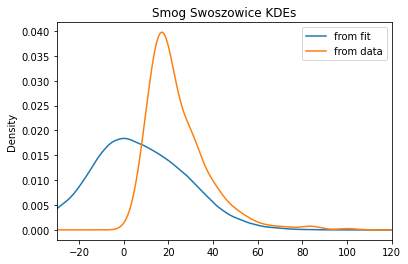

In [328]:
smog_ws_sw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-30, 120)
plt.legend()
plt.title("Smog Swoszowice KDEs")
plt.show()

In [329]:
smog_sw_fit_data = fit_sw.draws_pd()
smog_sw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1067.86,0.980020,0.027776,6.0,127.0,0.0,1070.20,33.1934,-0.297366,-0.435096,...,-3.67519,-4.25531,-3.62254,-3.53934,-3.53137,-3.64251,-4.26713,-4.76862,-3.70384,-4.37231
1,-1065.90,0.934449,0.027776,5.0,43.0,0.0,1070.42,33.0939,-0.276164,-0.413363,...,-3.60900,-4.35546,-3.56172,-3.43834,-3.41558,-3.60173,-4.37563,-5.00998,-3.63937,-4.50934
2,-1065.74,0.901213,0.027776,7.0,127.0,0.0,1070.15,32.9956,-0.222668,-0.472248,...,-3.58907,-4.38323,-3.59781,-3.51339,-3.46318,-3.60465,-4.36700,-4.80546,-3.62333,-4.29347
3,-1065.78,1.000000,0.027776,3.0,7.0,0.0,1066.11,33.0040,-0.194263,-0.511601,...,-3.55881,-4.38822,-3.51446,-3.45213,-3.42593,-3.50357,-4.34684,-4.83720,-3.60686,-4.27314
4,-1067.18,0.916299,0.027776,7.0,127.0,0.0,1070.83,31.1183,-0.178666,-0.502563,...,-3.55984,-4.42718,-3.58439,-3.51395,-3.44879,-3.57754,-4.38831,-4.84036,-3.59803,-4.41322


In [330]:
smog_sw_fit_df = pd.DataFrame(smog_sw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df)}]'].values.flatten())
smog_sw_fit_df.columns = ["smog"]
smog_sw_fit_df.head()

,smog
0,33.68610
1,48.74950
2,5.55400
3,1.72446
4,11.97300


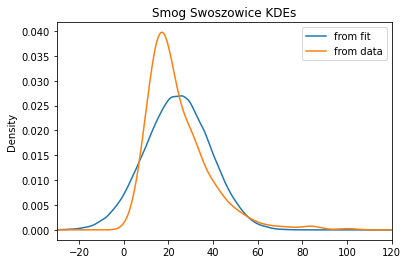

In [331]:
smog_sw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-30, 120)
plt.legend()
plt.title("Smog Swoszowice KDEs")
plt.show()

## LOO/WAIC for smog on Złoty Róg Street

In [334]:
fit_normal = az.from_cmdstanpy(posterior=fit_zr, posterior_predictive = 'smog_hat', observed_data = {'smog': df_zr["smog Złoty Róg"]})
fit_student= az.from_cmdstanpy(posterior=fit_zr_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df_zr["smog Złoty Róg"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo     p_loo  elpd_diff    weight  \
Smog Fit Normal Model        0  2809.316003  4.571082   0.000000  0.719364   
Smog Fit T_Student Model     1  2838.709414  5.373138  29.393412  0.280636   

                                 se        dse  warning     scale  
Smog Fit Normal Model     33.482254   0.000000    False  deviance  
Smog Fit T_Student Model  33.064430  18.840962    False  deviance  


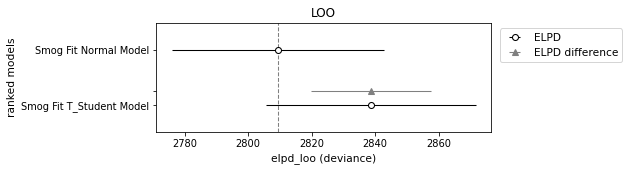

In [335]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

                          rank    elpd_waic    p_waic  elpd_diff    weight  \
Smog Fit Normal Model        0  2809.228232  4.527197   0.000000  0.719249   
Smog Fit T_Student Model     1  2838.605190  5.321026  29.376959  0.280751   

                                 se       dse  warning     scale  
Smog Fit Normal Model     33.472997   0.00000    False  deviance  
Smog Fit T_Student Model  33.064545  18.83691    False  deviance  


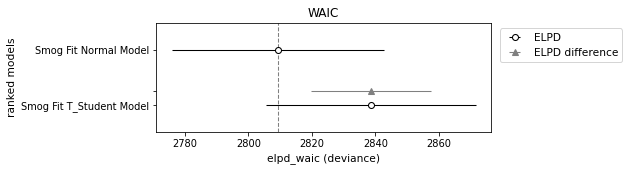

In [336]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()

## LOO/WAIC for smog on Bulwarowa Street

In [337]:
fit_normal = az.from_cmdstanpy(posterior=fit, posterior_predictive = 'smog_hat', observed_data = {'smog': df_b["smog Bulwarowa"]})
fit_student= az.from_cmdstanpy(posterior=fit_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df_b["smog Bulwarowa"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo     p_loo  elpd_diff    weight  \
Smog Fit Normal Model        0  2925.820563  4.300982   0.000000  0.931408   
Smog Fit T_Student Model     1  2988.749887  4.968465  62.929324  0.068592   

                                 se        dse  warning     scale  
Smog Fit Normal Model     33.276718   0.000000    False  deviance  
Smog Fit T_Student Model  31.847737  17.024722    False  deviance  


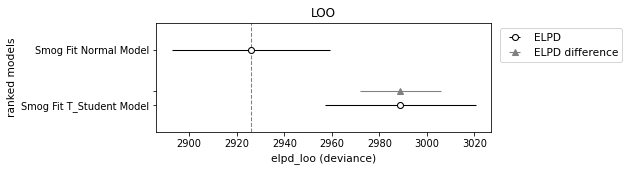

In [338]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

                          rank    elpd_waic    p_waic  elpd_diff    weight  \
Smog Fit Normal Model        0  2925.728118  4.254760   0.000000  0.931454   
Smog Fit T_Student Model     1  2988.658242  4.922643  62.930123  0.068546   

                                 se       dse  warning     scale  
Smog Fit Normal Model     33.268463   0.00000    False  deviance  
Smog Fit T_Student Model  31.847766  17.02156    False  deviance  


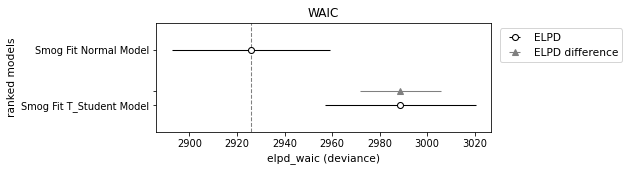

In [339]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()

## LOO/WAIC for smog in Swoszowice

In [340]:
fit_normal = az.from_cmdstanpy(posterior=fit_sw, posterior_predictive = 'smog_hat', observed_data = {'smog': df_sw["smog Swoszowice"]})
fit_student= az.from_cmdstanpy(posterior=fit_sw_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df_sw["smog Swoszowice"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo     p_loo  elpd_diff    weight  \
Smog Fit T_Student Model     0  2774.234861  5.547929   0.000000  0.475419   
Smog Fit Normal Model        1  2795.846298  6.434565  21.611437  0.524581   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  34.065449   0.000000    False  deviance  
Smog Fit Normal Model     46.937896  31.962412    False  deviance  


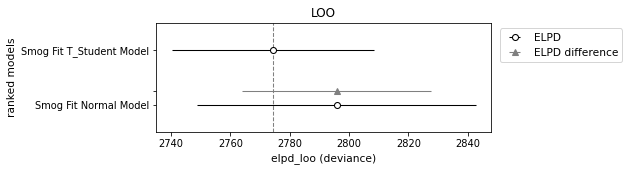

In [341]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                          rank    elpd_waic    p_waic  elpd_diff    weight  \
Smog Fit T_Student Model     0  2774.110788  5.485892   0.000000  0.475732   
Smog Fit Normal Model        1  2795.801565  6.412198  21.690777  0.524268   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  34.065156   0.000000    False  deviance  
Smog Fit Normal Model     46.950066  31.978253     True  deviance  


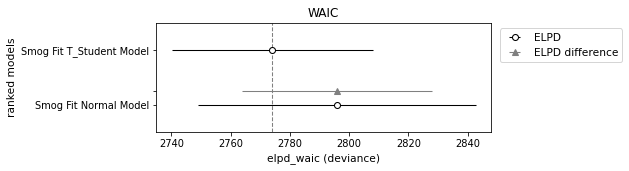

In [342]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()